<h1 align='center'> Compressive Strength of Concrete </h1>

### Context :

Concrete is the most important material in civil engineering. The concrete compressive strength is a highly nonlinear function of age and ingredients. Compressive strength or compression strength is the capacity of a material or structure to withstand loads tending to reduce the size, as opposed to which withstands loads tending to elongate. In other words, compressive strength resists being pushed together, whereas tensile strength resists tension (being pulled apart). In the study of strength of materials, tensile strength, compressive strength, and shear strength can be analyzed independently.

### Objective: 
 Your objective is to build a machine learning model that would help Civil Engineers to estimate the compressive strength of the concrete and they can further take a decision whether the concrete should be used in their current project or not.
 
###  About the Data :
The dataset has 9 columns which tell you different measurements related to the concrete.

#### Data Description 
- Cement (component 1)(kg in a m3 mixture): Cement   (component 1) -- Kilogram in a meter-cube mixture -- Input Variable
- Blast Furnace Slag (component 2)(kg in a m3 mixture): Blast Furnace   Slag (component 2) -- kg in a m3 mixture -- Input Variable
- Fly Ash (component 3)(kg in a m3 mixture): Fly Ash   (component 3) -- kg in a m3 mixture -- Input Variable
- Water  (component 4)(kg in a m3   mixture): Water   (component 4) -- kg in a m3 mixture -- Input Variable
- Superplasticizer (component 5)(kg in a m3 mixture): Superplasticizer   (component 5) -- kg in a m3 mixture -- Input Variable
- Coarse Aggregate  (component 6)(kg   in a m3 mixture): Coarse   Aggregate (component 6) -- kg in a m3 mixture -- Input Variable
- Fine Aggregate (component 7)(kg in a m3 mixture): Fine Aggregate   (component 7) -- kg in a m3 mixture -- Input Variable
- Age (day): Age -- Day   (1-365) -- Input Variable
- Concrete compressive strength(MPa, megapascals): Concrete   compressive strength -- MegaPascals -- Output Variable

### Evaluation Criteria
Submissions are evaluated using Root-Mean-Squared-Error (RMSE).


#### Acknowledgement
This dataset has been sourced from the UCI Machine Learning Repository.

<hr>



### Importing Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading Training Dataset

In [2]:
df  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/concrete_data/training_set_label.csv" )
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,298.20,0.0,107.00,209.70,11.10,879.6,744.20,28,31.875165
1,397.00,0.0,0.00,186.00,0.00,1040.0,734.00,28,36.935229
2,251.37,0.0,118.27,188.45,6.35,1028.4,757.73,56,36.638755
3,304.00,140.0,0.00,214.00,6.00,895.0,722.00,28,33.418902
4,297.00,0.0,0.00,186.00,0.00,1040.0,734.00,7,30.957472


#### Renaming Columns 

In [3]:
df_new = df.rename(columns={ 'Cement (component 1)(kg in a m^3 mixture)': 'Cement' ,
                            'Blast Furnace Slag (component 2)(kg in a m^3 mixture)': 'Blast_Furnace_Slag',
                            'Fly Ash (component 3)(kg in a m^3 mixture)': 'FlyAsh',
                             'Water  (component 4)(kg in a m^3 mixture)': 'Water',
                              'Superplasticizer (component 5)(kg in a m^3 mixture)': 'Superplasticizer',
                            'Coarse Aggregate  (component 6)(kg in a m^3 mixture)': 'Coarse_Aggregate',
                             'Fine Aggregate (component 7)(kg in a m^3 mixture)': 'Fine_Aggregate' , 
                            'Age (day)': 'Age_Day',
                            'Concrete compressive strength(MPa, megapascals) ':'Output'
                           })
df_new.head()

,Cement,Blast_Furnace_Slag,FlyAsh,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age_Day,Output
0,298.20,0.0,107.00,209.70,11.10,879.6,744.20,28,31.875165
1,397.00,0.0,0.00,186.00,0.00,1040.0,734.00,28,36.935229
2,251.37,0.0,118.27,188.45,6.35,1028.4,757.73,56,36.638755
3,304.00,140.0,0.00,214.00,6.00,895.0,722.00,28,33.418902
4,297.00,0.0,0.00,186.00,0.00,1040.0,734.00,7,30.957472


### Inspecting Data

In [4]:
df_new.shape

(772, 9)

- Training Dataset comprises 772 observations(rows) and 9 features(columns).
- Out of the 9, one is the target variable and rest 8 are input variables.

In [5]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 772 entries, 0 to 771
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              772 non-null    float64
 1   Blast_Furnace_Slag  772 non-null    float64
 2   FlyAsh              772 non-null    float64
 3   Water               772 non-null    float64
 4   Superplasticizer    772 non-null    float64
 5   Coarse_Aggregate    772 non-null    float64
 6   Fine_Aggregate      772 non-null    float64
 7   Age_Day             772 non-null    int64  
 8   Output              772 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 54.4 KB


- The data has only float and integer values.
- There are no missing values

In [6]:
df_new.isna().sum()

Cement                0
Blast_Furnace_Slag    0
FlyAsh                0
Water                 0
Superplasticizer      0
Coarse_Aggregate      0
Fine_Aggregate        0
Age_Day               0
Output                0
dtype: int64

### Statistical Summary
- Get a Statistical Overview using Describe

In [7]:
df_new.describe().T

,count,mean,std,min,25%,50%,75%,max
Cement,772.0,280.722565,104.711803,102.000000,190.340000,275.000000,350.000000,540.000000
Blast_Furnace_Slag,772.0,76.496140,87.477423,0.000000,0.000000,24.000000,144.775000,359.400000
FlyAsh,772.0,52.701347,63.596763,0.000000,0.000000,0.000000,118.187500,200.100000
Water,772.0,182.361593,20.913641,121.750000,166.677500,185.700000,193.000000,237.000000
Superplasticizer,772.0,6.000848,5.844002,0.000000,0.000000,6.050000,10.025000,32.200000
Coarse_Aggregate,772.0,971.558782,77.078828,801.000000,932.000000,968.000000,1028.100000,1145.000000
Fine_Aggregate,772.0,771.618355,79.785875,594.000000,724.300000,777.800000,821.000000,992.600000
Age_Day,772.0,44.993523,60.442735,1.000000,12.250000,28.000000,56.000000,365.000000
Output,772.0,35.724196,16.797389,2.331808,23.677591,33.870853,46.232813,82.599225


### Inference:
- The maximum number of attributes(predictors)  has a **large difference between 75th %tile and max values** .
- Blast_Furnance_slag, FlyAsh, Age_Day has a **large difference between Mean and Median values**

Thus, the observation suggest that there are extreme values i.e Outliers in our dataset.

### EDA 

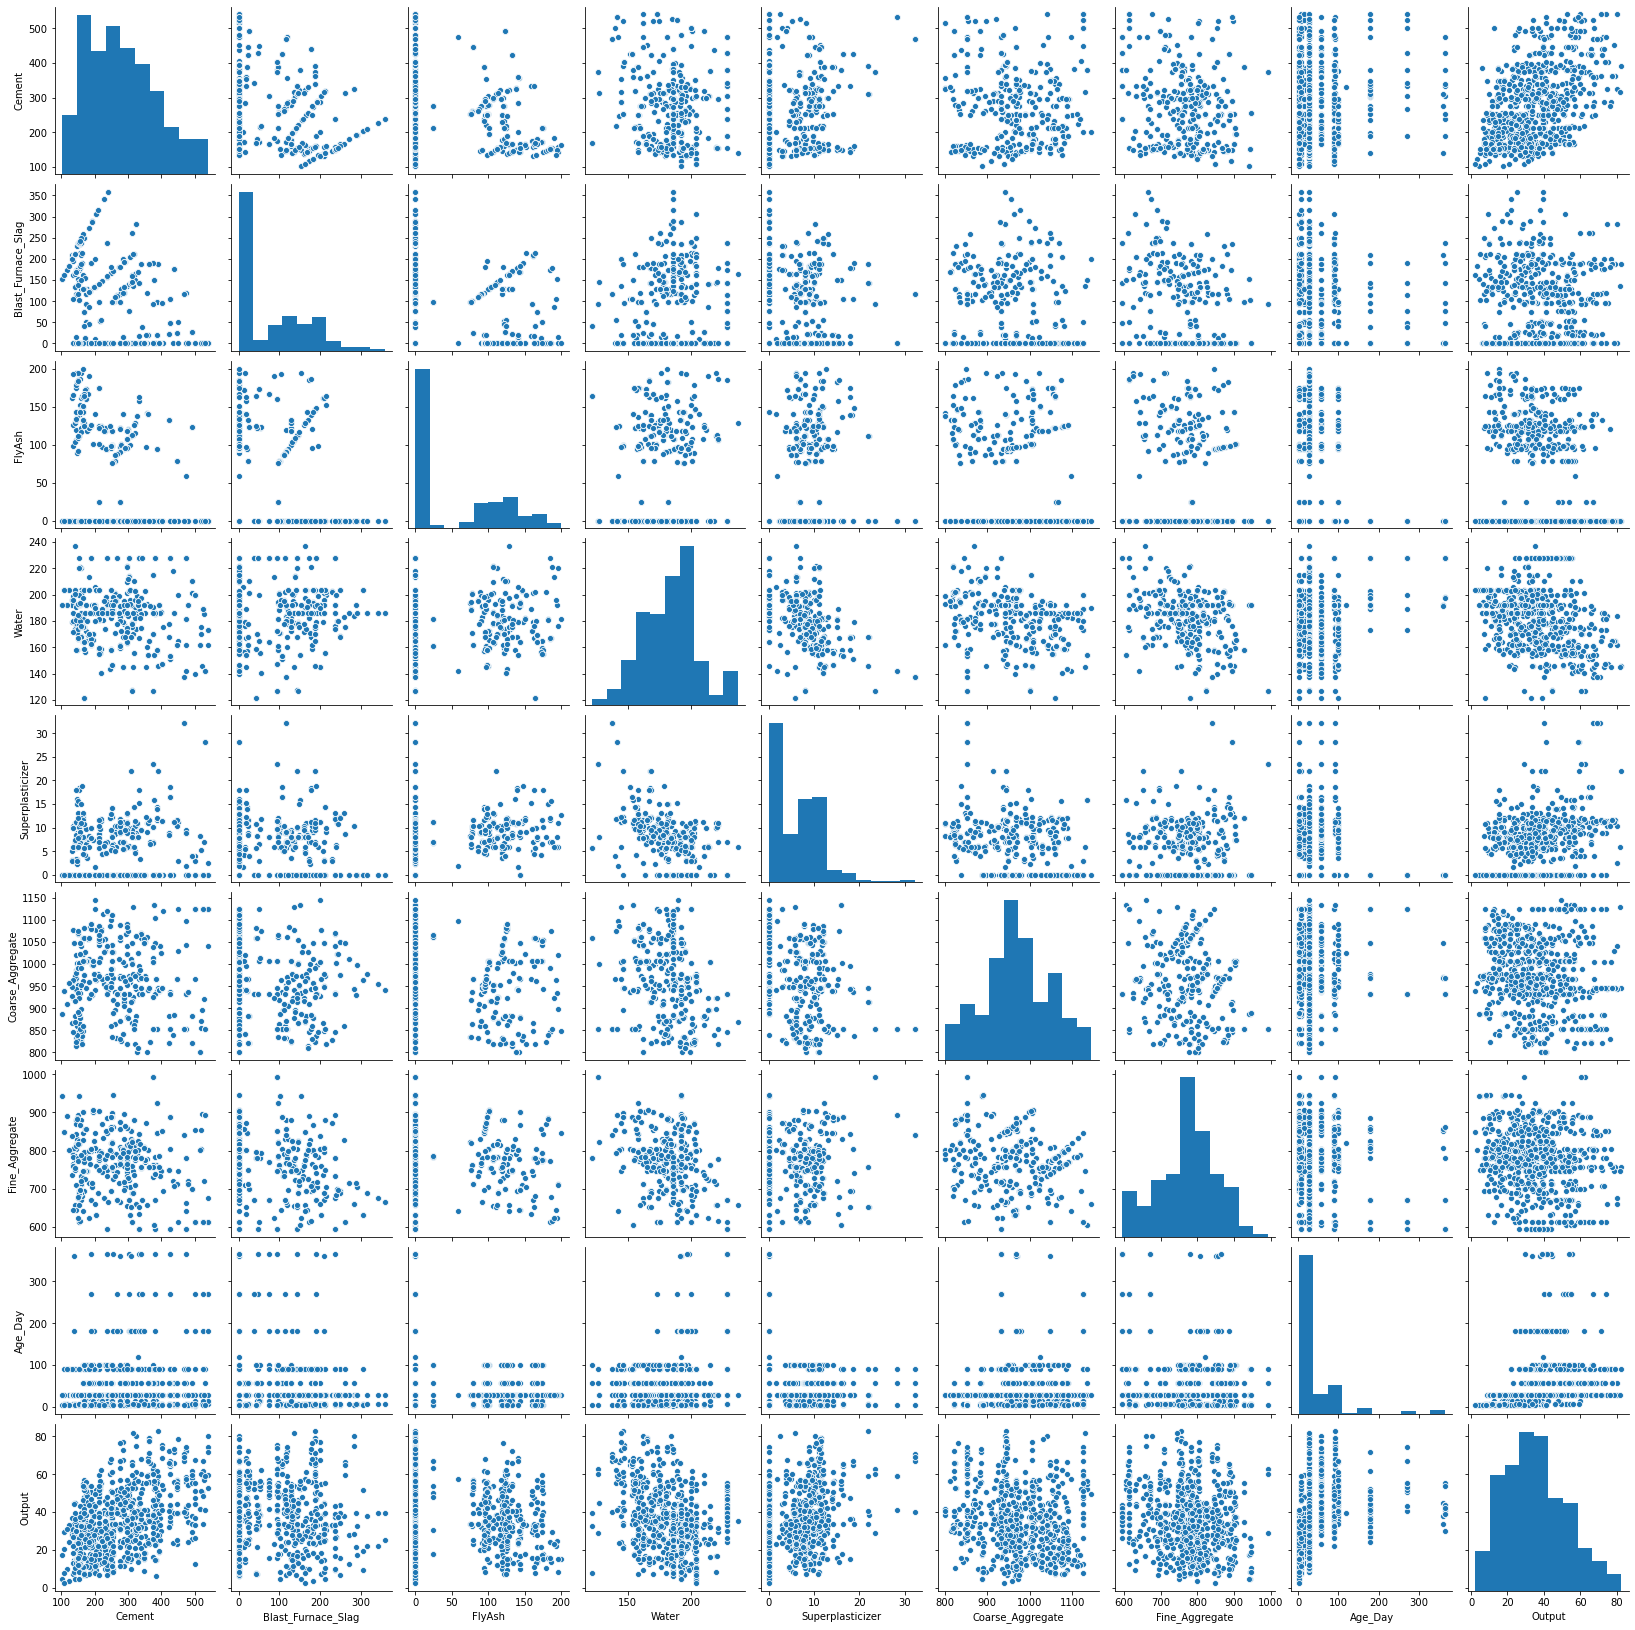

In [8]:
sns.pairplot(df_new)

Looking at scatterplot for this pair of variables, 
- We can see the positive linear correlation between some variables like Cement and target variable. 
- We can observe the upward trend, and also the points are not too dispersed.

#### Checking distributions 

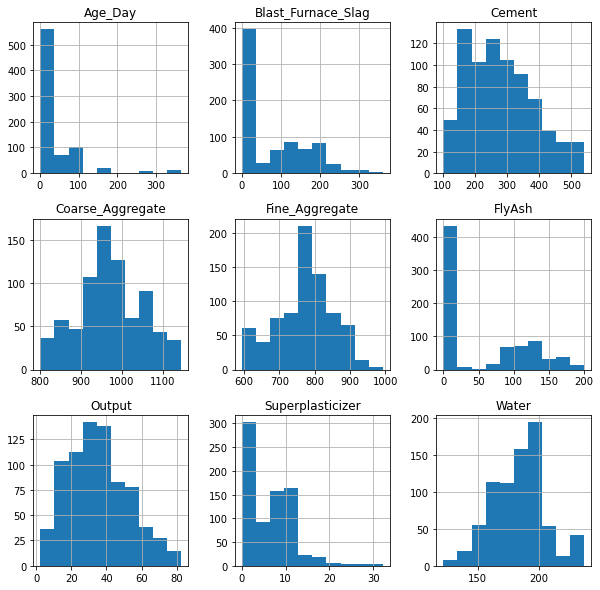

In [9]:
df_new.hist(figsize=(10,10))
plt.show()

### Inference :
- The distribution of the attribute “Superplasticizer” seems to be positively skewed i.e the curve is shifted towards the left.
- The attributes 'Coarse Aggregate' and 'Fine Aggregate', 'Water' are quite normally distributed.

### Outlier Detection  

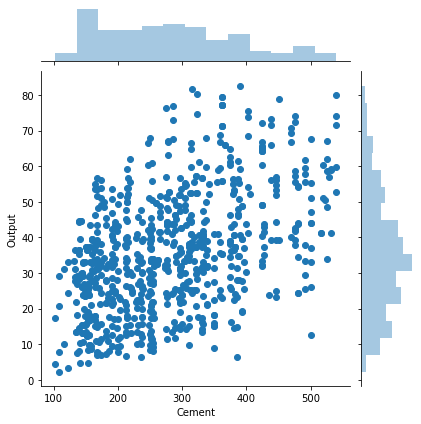

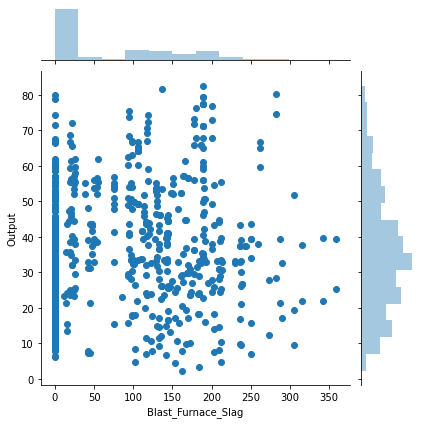

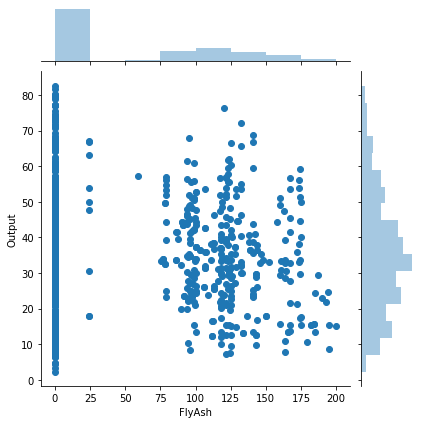

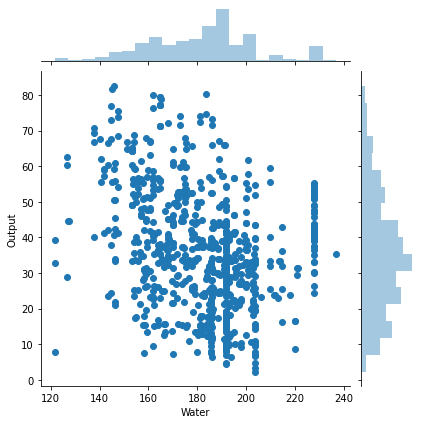

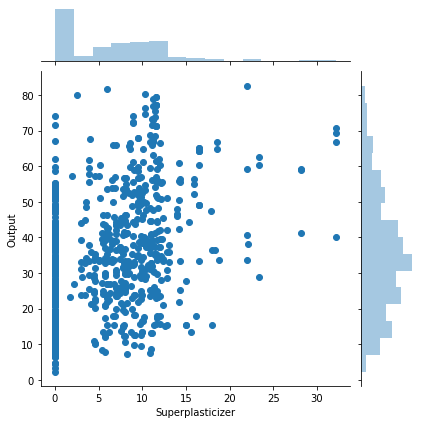

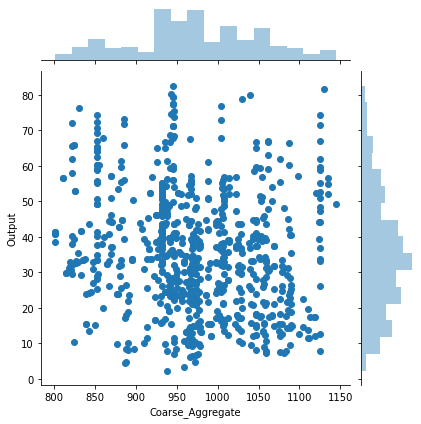

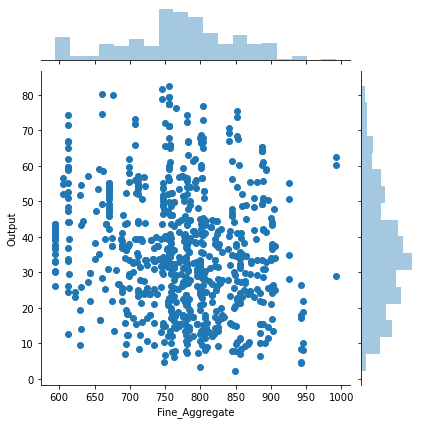

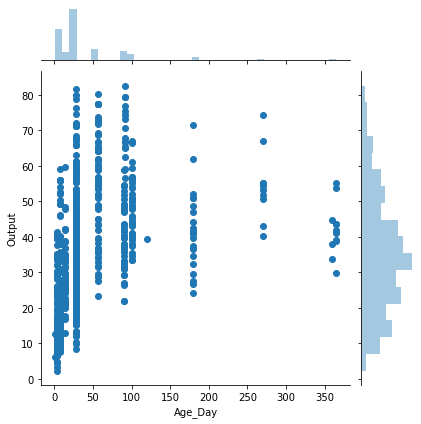

In [10]:
col = ['Cement', 'Blast_Furnace_Slag', 'FlyAsh', 'Water', 'Superplasticizer',
       'Coarse_Aggregate', 'Fine_Aggregate', 'Age_Day']
for i in col:
    #sns.boxplot(df_new[i])
    sns.jointplot(x=df_new[i], y='Output', data=df_new)
    plt.show()

- Superplasticizers, Fine Aggregate seems to have some outliers

But these outliers are no much far from the trend, So we will keep them as it is.


### Correlation Matrix 

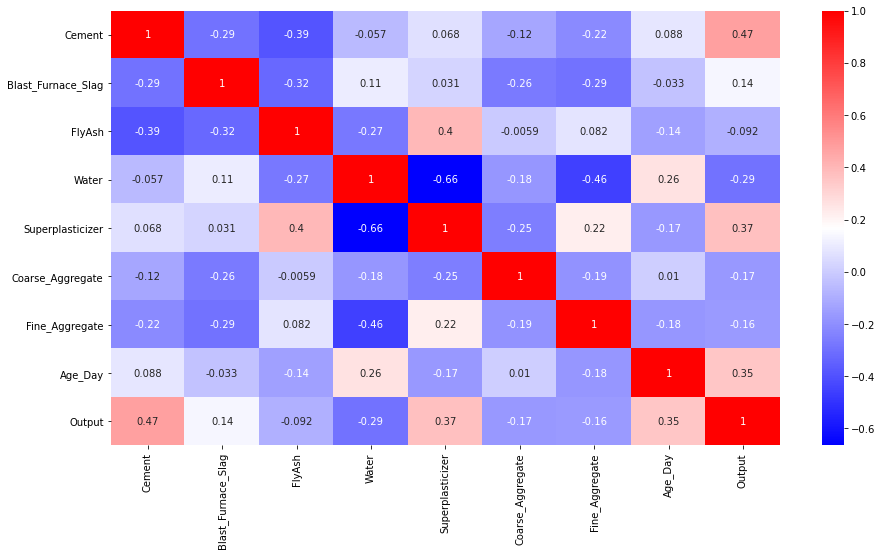

In [11]:
plt.figure(figsize=(15,8))
sns.heatmap(df_new.corr(), annot=True, cmap='bwr')

### Inference
- Cement has the highest positive correlation with output/target variable
- There is a relatively high positive correlation between FlyAsh, Superplasticizer. 
- There is a relatively high negative correlation between Superplasticizer & Water and  Water Fine_Aggregate. 
- There is moderate correlation between Age_Day, Superplasticier 

### Split data into x and y:

In [12]:
x = df_new.drop(['Output'], axis=1)
x.head()

,Cement,Blast_Furnace_Slag,FlyAsh,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age_Day
0,298.20,0.0,107.00,209.70,11.10,879.6,744.20,28
1,397.00,0.0,0.00,186.00,0.00,1040.0,734.00,28
2,251.37,0.0,118.27,188.45,6.35,1028.4,757.73,56
3,304.00,140.0,0.00,214.00,6.00,895.0,722.00,28
4,297.00,0.0,0.00,186.00,0.00,1040.0,734.00,7


In [13]:
y = df_new.Output
y.head()

0    31.875165
1    36.935229
2    36.638755
3    33.418902
4    30.957472
Name: Output, dtype: float64

### Spliting dataset into test and training data 

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

<h2 align='center'> RandomForest </h2>

### Training Model

In [15]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators= 1000, random_state= 42)
rf.fit(x_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

### Prediction on Training and Test set

In [16]:
train_pred = rf.predict(x_train)
pred = rf.predict(x_test)

#### Accuracy on Training and Test dataset

In [17]:
from sklearn.metrics import r2_score, mean_squared_error

In [18]:
print("Training Accuracy: ", r2_score(y_train, train_pred))
print("Test Accuracy: ", r2_score(y_test, pred))

Training Accuracy:  0.9848818622940736
Test Accuracy:  0.8893022242738767


* AS there is ~10% difference of Training and Test Accuracy, ie Model is Overfitted

#### RMSE Value on Training and Test Dataset 

In [19]:
print("RMSE on Training Data: ", np.sqrt(mean_squared_error(y_train, train_pred)))
print("RMSE On Test Data: ", np.sqrt(mean_squared_error(y_test, pred)))

RMSE on Training Data:  2.0859313652833724
RMSE On Test Data:  5.399441212872351


* The RMSE on Test data is much higher than Training Dataset

### Vizualising Results 

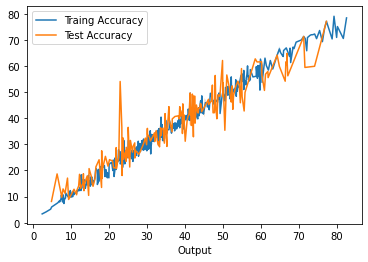

In [20]:
sns.lineplot(y_train, train_pred, label='Traing Accuracy')
sns.lineplot(y_test, pred, label = 'Test Accuracy')
plt.show()

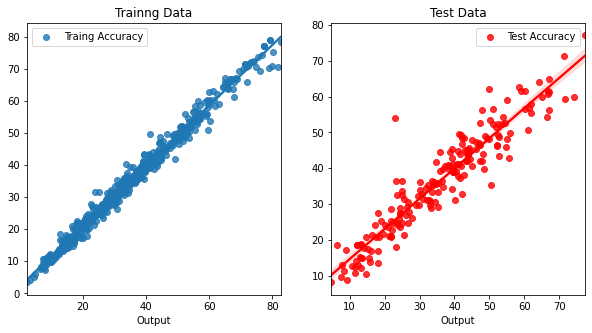

In [21]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.regplot(y_train, train_pred, label='Traing Accuracy')
plt.title("Trainng Data")
plt.legend()

plt.subplot(1,2,2)
sns.regplot(y_test, pred, label='Test Accuracy', color='r')
plt.title("Test Data")
plt.legend()

plt.show()

### Hyper-parameter tunning
* Tried to reduce RMSE Value 
* Tried to reduce the difference of training and test dataset

In [22]:
rf1 = RandomForestRegressor(n_estimators= 250, 
                            max_depth=14 , max_features=5 , min_samples_split=2, max_leaf_nodes =200,
                            random_state= 42)
# Training Model
rf1.fit(x_train, y_train)

# Prediction 
rf1_pred_train = rf1.predict(x_train)
rf1_pred = rf1.predict(x_test)

#### Accuracy on Training and Test set 

In [23]:
print("Training Accuracy: ", r2_score(y_train, rf1_pred_train))
print("Test Accuracy: ", r2_score(y_test, rf1_pred))

Training Accuracy:  0.9830525866716016
Test Accuracy:  0.8842889323311215


* By Hyperparameter tuning also , Difference is approx. similar

#### RMSE Value on Training and Test set 

In [24]:
print("RMSE on Training Data: ", np.sqrt(mean_squared_error(y_train, rf1_pred_train)))
print("RMSE On Test Data: ", np.sqrt(mean_squared_error(y_test, rf1_pred)))

RMSE on Training Data:  2.2085263072420265
RMSE On Test Data:  5.520352625852658


* The RMSE Value on Test Data is much higher than Training Data

### Visualising Results 

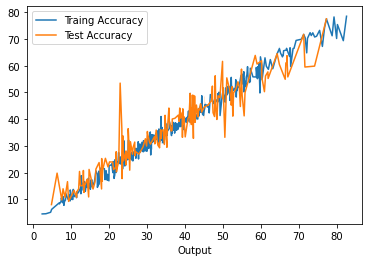

In [25]:
sns.lineplot(y_train, rf1_pred_train, label='Traing Accuracy')
sns.lineplot(y_test, rf1_pred, label = 'Test Accuracy')
plt.show()

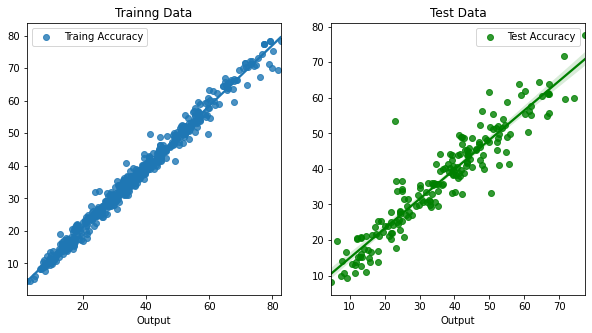

In [26]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.regplot(y_train, rf1_pred_train, label='Traing Accuracy')
plt.title("Trainng Data")
plt.legend()

plt.subplot(1,2,2)
sns.regplot(y_test, rf1_pred, label='Test Accuracy', color='g')
plt.title("Test Data")
plt.legend()

plt.show()

<h2 align='center'> Gradient Boost </h2>

In [27]:
from sklearn.ensemble import GradientBoostingRegressor

#### Training Model 

In [28]:
gb = GradientBoostingRegressor()
gb.fit(x_train, y_train)

GradientBoostingRegressor()

#### Prediction on Test and Training set 

In [29]:
gb_pred_train = gb.predict(x_train)
gb_pred = gb.predict(x_test)

#### Accuracy on Training and Test set 

In [30]:
print("Training Accuracy: ", r2_score(y_train, gb_pred_train))
print("Test Accuracy: ", r2_score(y_test, gb_pred))

Training Accuracy:  0.9534784339978747
Test Accuracy:  0.902077251651129


* Accuracy on Training Data is much higher than Test , hence Model is Overfitted

#### RMSE Value on Training and Test Dataset 

In [31]:
print("RMSE On Trainng Data: ",np.sqrt(mean_squared_error(y_train, gb_pred_train)))
print("RMSE On Test Data: ", np.sqrt(mean_squared_error(y_test, gb_pred)))

RMSE On Trainng Data:  3.6591315972129337
RMSE On Test Data:  5.078332900789462


* The diffrenece of RMSE On Test data and Training Data is High

### Visualising Results 

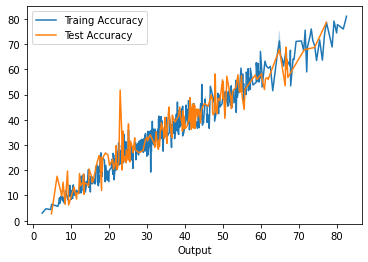

In [32]:
sns.lineplot(y_train, gb_pred_train, label='Traing Accuracy')
sns.lineplot(y_test, gb_pred, label = 'Test Accuracy')
plt.show()

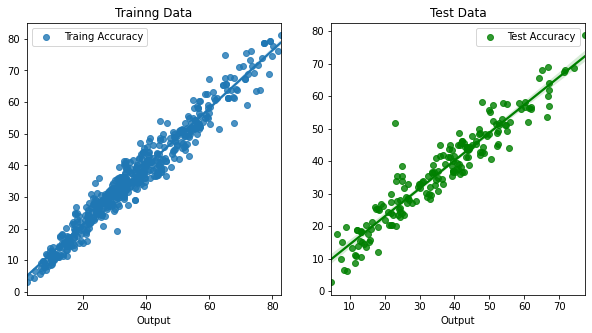

In [33]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.regplot(y_train, gb_pred_train, label='Traing Accuracy')
plt.title("Trainng Data")
plt.legend()

plt.subplot(1,2,2)
sns.regplot(y_test, gb_pred, label='Test Accuracy', color='g')
plt.title("Test Data")
plt.legend()

plt.show()

### Hyper-parameter Tuning 

* Tried to reduce RMSE Value 
* Tried to reduce the difference of training and test dataset

In [34]:
gb2 = GradientBoostingRegressor(n_estimators = 1000, 
                                learning_rate=0.1, max_depth=5, alpha = 0.8, max_features=5, max_leaf_nodes=14,
                                random_state=42, subsample=0.9, min_samples_split=3
                               )
gb2.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.8, max_depth=5, max_features=5,
                          max_leaf_nodes=14, min_samples_split=3,
                          n_estimators=1000, random_state=42, subsample=0.9)

####  Prediction on Test and Training Set

In [35]:
gb2_pred_train = gb2.predict(x_train)
gb2_pred = gb2.predict(x_test)

#### Accuracy on Training and Test Set 

In [36]:
print("Training Accuracy: ", r2_score(y_train, gb2_pred_train))
print("Test Accuracy: ", r2_score(y_test, gb2_pred))

Training Accuracy:  0.9998269093305746
Test Accuracy:  0.9349894903069743


* There is  Difference in Training and Test set Accuracy, Model is prone to Overfiting

#### RMSE Value on Training and Test Set 

In [37]:
print("RMSE On Trainng Data: ",np.sqrt(mean_squared_error(y_train, gb2_pred_train)))
print("RMSE On Test Data: ", np.sqrt(mean_squared_error(y_test, gb2_pred)))

RMSE On Trainng Data:  0.2231966617683837
RMSE On Test Data:  4.137815816124257


* RMSE Value decreases by Hyper-parameter Tunning

### Visualising Results 

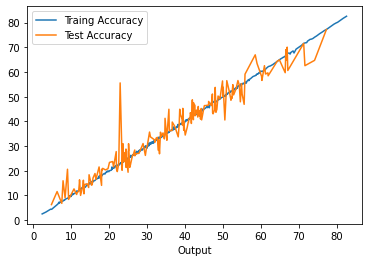

In [38]:
sns.lineplot(y_train, gb2_pred_train, label='Traing Accuracy')
sns.lineplot(y_test, gb2_pred, label = 'Test Accuracy')
plt.show()

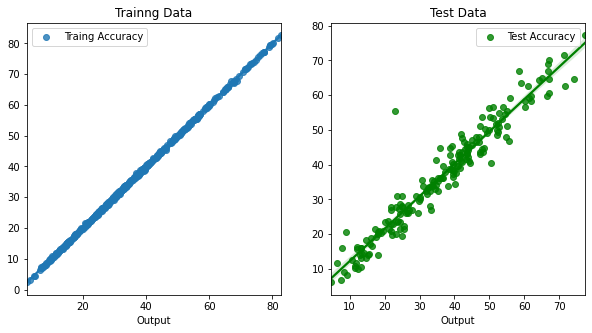

In [39]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.regplot(y_train, gb2_pred_train, label='Traing Accuracy')
plt.title("Trainng Data")
plt.legend()

plt.subplot(1,2,2)
sns.regplot(y_test, gb2_pred, label='Test Accuracy', color='g')
plt.title("Test Data")
plt.legend()

plt.show()

<h2 align='center'> XG-Boost </h2>

In [40]:
import xgboost as xgb

#### Training Model 

In [41]:
xg = xgb.XGBRegressor(max_depth=5, n_estimators = 250, learning_rate=0.1, n_jobs = -1)
xg.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=250, n_jobs=-1, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

#### Prediction on Test and Training Set 

In [42]:
xg_pred_train = xg.predict(x_train)
xg_pred = xg.predict(x_test)

#### Accuracy on Training and Test Set 

In [43]:
print("Training Accuracy: ", r2_score(y_train, xg_pred_train))
print("Test Accuracy: ", r2_score(y_test, xg_pred))

Training Accuracy:  0.9974991897888913
Test Accuracy:  0.9171473836637104


* Test set accuracy is lesser than Training set accuracy , Model is prone to Overfiitng

#### RMSE Value on Training and Test Set 

In [44]:
print("RMSE On Trainng Data: ",np.sqrt(mean_squared_error(y_train, xg_pred_train)))
print("RMSE On Test Data: ", np.sqrt(mean_squared_error(y_test, xg_pred)))

RMSE On Trainng Data:  0.8483815847470734
RMSE On Test Data:  4.671243251136031


* RMSE Value on Test data is high


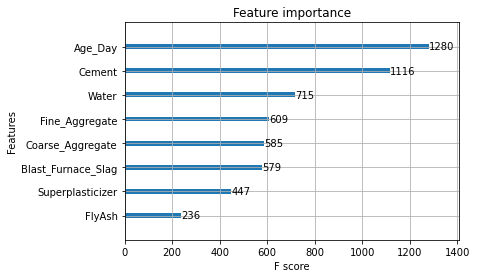

In [45]:
xgb.plot_importance(xg)

### Visualising Results 

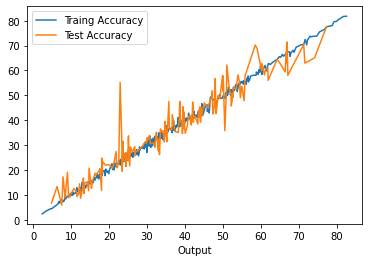

In [46]:
sns.lineplot(y_train, xg_pred_train, label='Traing Accuracy')
sns.lineplot(y_test, xg_pred, label = 'Test Accuracy')
plt.show()

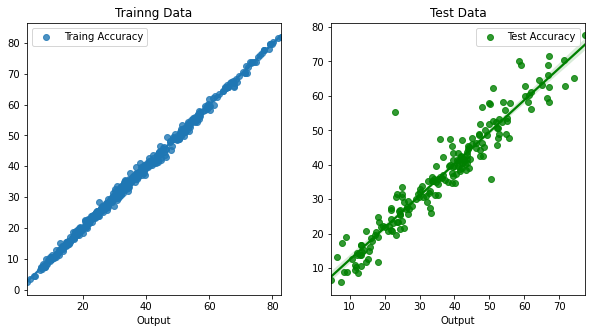

In [47]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.regplot(y_train, xg_pred_train, label='Traing Accuracy')
plt.title("Trainng Data")
plt.legend()

plt.subplot(1,2,2)
sns.regplot(y_test, xg_pred, label='Test Accuracy', color='g')
plt.title("Test Data")
plt.legend()

plt.show()

### Using Grid-Search CV

In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
xg1 = xgb.XGBRegressor( n_estimators = 1000, learning_rate=0.1)

param1 = {
    'max_depth' : range(3,10,2),
    'gamma' : [0.1,0.2,0.3],
    'subsample' : [0.8, 0.9],
    'colsample_bytree' : [0.6,0.7,0.8,0.9],
    'reg_alpha' : [0.01, 0.1, 1]
}

grid_search_xg = GridSearchCV(xg1, param1, n_jobs=-1, cv=5)
grid_search_xg.fit(x_train, y_train)
grid_search_xg.best_params_

{'colsample_bytree': 0.8,
 'gamma': 0.2,
 'max_depth': 3,
 'reg_alpha': 1,
 'subsample': 0.9}

#### Prediction on Test and Training Set using Best parameter for dataset

In [50]:
xg_best = grid_search_xg.best_estimator_
xg1_pred_train = xg_best.predict(x_train)
xg1_pred = xg_best.predict(x_test)

#### Accuracy on Training and Test Set 

In [51]:
print("Training Accuracy: ", r2_score(y_train, xg1_pred_train))
print("Test Accuracy: ", r2_score(y_test, xg1_pred))

Training Accuracy:  0.9957956694588639
Test Accuracy:  0.9328076365095543


* The Test set accuracy increaes , still the model is proned to Overfitting

#### RMSE Value on Training and Test Set 

In [52]:
print("RMSE On Training Data: ", np.sqrt(mean_squared_error(y_train, xg1_pred_train)))
print("RMSE On Test Data: ", np.sqrt(mean_squared_error(y_test, xg1_pred)))

RMSE On Training Data:  1.1000167350396572
RMSE On Test Data:  4.206678565616089


* RMSE Value decreases by Grid-search Cv

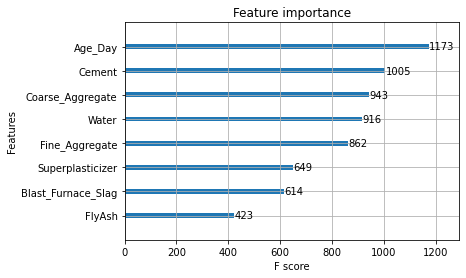

In [53]:
xgb.plot_importance(xg_best)

### Visualising Results 

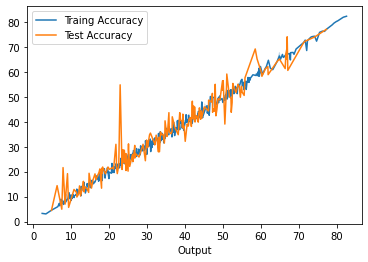

In [54]:
sns.lineplot(y_train, xg1_pred_train, label='Traing Accuracy')
sns.lineplot(y_test, xg1_pred, label = 'Test Accuracy')
plt.show()

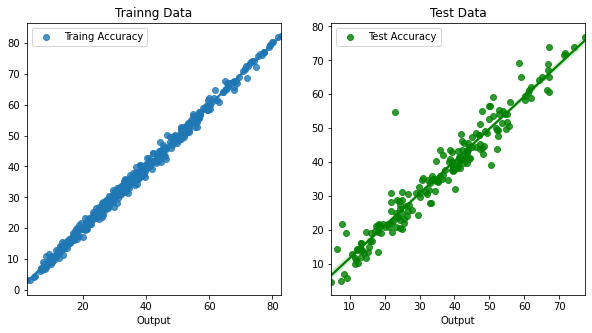

In [55]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.regplot(y_train, xg1_pred_train, label='Traing Accuracy')
plt.title("Trainng Data")
plt.legend()

plt.subplot(1,2,2)
sns.regplot(y_test, xg1_pred, label='Test Accuracy', color='g')
plt.title("Test Data")
plt.legend()

plt.show()

### Hyper-parameter tunning

In [56]:
xg2 = xgb.XGBRegressor(max_depth=5, n_estimators = 1000, learning_rate=0.1,
                       colsample_bytree=0.6, gamma = 0.1, reg_alpha = 1, subsample = 0.8,
                       n_jobs = -1, random_state =42)

xg2.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, gamma=0.1, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=-1, num_parallel_tree=1, random_state=42,
             reg_alpha=1, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
             tree_method='exact', validate_parameters=1, verbosity=None)

#### Prediction on Test and Training Set 

In [57]:
xg2_pred_train = xg2.predict(x_train)
xg2_pred = xg2.predict(x_test)

#### Accuracy on Training and Test Set 

In [58]:
print("Training Accuracy: ", r2_score(y_train, xg2_pred_train))
print("Test Accuracy: ", r2_score(y_test, xg2_pred))

Training Accuracy:  0.9993601259199139
Test Accuracy:  0.934348793922163


#### RMSE Value on Training and Test Set 

In [59]:
print("RMSE On Trainng Data: ",np.sqrt(mean_squared_error(y_train, xg2_pred_train)))
print("RMSE On Test Data: ", np.sqrt(mean_squared_error(y_test, xg2_pred)))

RMSE On Trainng Data:  0.42913913860695635
RMSE On Test Data:  4.158155480029298


* RMSE Values decreases

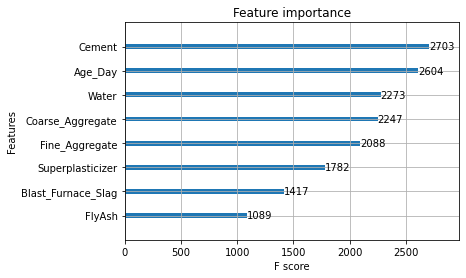

In [60]:
xgb.plot_importance(xg2)

### Visualising Results 

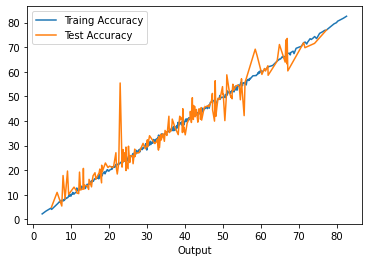

In [61]:
sns.lineplot(y_train, xg2_pred_train, label='Traing Accuracy')
sns.lineplot(y_test, xg2_pred, label = 'Test Accuracy')
plt.show()

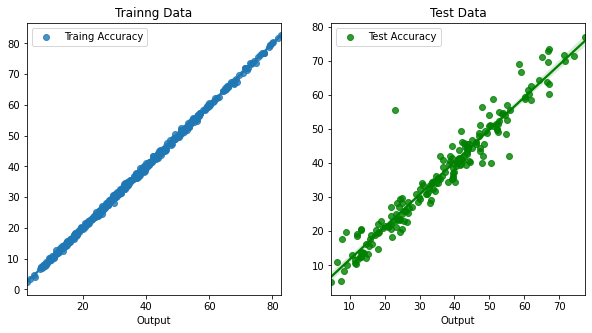

In [62]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.regplot(y_train, xg2_pred_train, label='Traing Accuracy')
plt.title("Trainng Data")
plt.legend()

plt.subplot(1,2,2)
sns.regplot(y_test, xg2_pred, label='Test Accuracy', color='g')
plt.title("Test Data")
plt.legend()

plt.show()

<h1 align='center'> Test- Dataset </h1>

In [63]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/concrete_data/testing_set_label.csv')
test_data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
0,167.00,187.00,195.00,185.00,7.00,898.0,636.00,28
1,148.50,139.40,108.60,192.70,6.10,892.4,780.00,28
2,154.80,0.00,142.80,193.30,9.10,877.2,867.70,28
3,236.00,0.00,0.00,193.00,0.00,968.0,885.00,365
4,168.88,42.22,124.25,158.33,10.83,1080.8,796.15,14


### Renaming Columns

In [74]:
t_new = test_data.rename(columns={ 'Cement (component 1)(kg in a m^3 mixture)': 'Cement' ,
                            'Blast Furnace Slag (component 2)(kg in a m^3 mixture)': 'Blast_Furnace_Slag',
                            'Fly Ash (component 3)(kg in a m^3 mixture)': 'FlyAsh',
                             'Water  (component 4)(kg in a m^3 mixture)': 'Water',
                              'Superplasticizer (component 5)(kg in a m^3 mixture)': 'Superplasticizer',
                            'Coarse Aggregate  (component 6)(kg in a m^3 mixture)': 'Coarse_Aggregate',
                             'Fine Aggregate (component 7)(kg in a m^3 mixture)': 'Fine_Aggregate' , 
                            'Age (day)': 'Age_Day'
                           })
t_new.head()

,Cement,Blast_Furnace_Slag,FlyAsh,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age_Day
0,167.00,187.00,195.00,185.00,7.00,898.0,636.00,28
1,148.50,139.40,108.60,192.70,6.10,892.4,780.00,28
2,154.80,0.00,142.80,193.30,9.10,877.2,867.70,28
3,236.00,0.00,0.00,193.00,0.00,968.0,885.00,365
4,168.88,42.22,124.25,158.33,10.83,1080.8,796.15,14


### Predicting Value Using Random-Forest 

In [65]:
ypred = rf1.predict(test_data)
target = []
for i in ypred:
    target.append(float(i))
#print(target)

In [68]:
result = pd.DataFrame(ypred) 
result.index = test_data.index 
result.columns = ["prediction"]
result.to_csv("Prediction_results_RandomForest.csv",index=False)

In [69]:
pd.read_csv('Prediction_results_RandomForest.csv')

,prediction
0,31.157310
1,25.273679
2,13.498994
3,26.685335
4,26.248063
...,...
253,58.431984
254,60.151731
255,21.089724
256,31.331872


<h1 align='center'> RMSE Value on Test Dataset : 4.77308 </h1>

### Predicting Values Using Gradient Boost

In [70]:
ypred = gb2.predict(test_data)
target = []
for i in ypred:
    target.append(float(i))
#print(target)

In [71]:
result = pd.DataFrame(ypred) 
result.index = test_data.index 
result.columns = ["prediction"]
result.to_csv("Prediction_results_GradientBoost.csv",index=False)

In [72]:
pd.read_csv('Prediction_results_GradientBoost.csv')

,prediction
0,31.255259
1,23.529071
2,9.886168
3,26.801883
4,22.893991
...,...
253,63.618381
254,60.249455
255,21.367040
256,32.234642


<h1 align='center'> RMSE Value on Test Dataset : 4.429126 </h1>

### Prediction Using XG-Boost

In [75]:
ypred = xg2.predict(t_new)
target = []
for i in ypred:
    target.append(float(i))
#print(target)

In [76]:
result = pd.DataFrame(ypred) 
result.index = test_data.index 
result.columns = ["prediction"]
result.to_csv("Prediction_results_XGBoost.csv",index=False)

In [77]:
pd.read_csv('Prediction_results_XGBoost.csv')

,prediction
0,29.417751
1,23.954912
2,9.192623
3,26.997570
4,23.389816
...,...
253,65.954520
254,60.136600
255,21.704159
256,31.294514


<h1 align='center'> RMSE Value on Test Dataset : 3.922233  </h1>

## Conclusion :

<hr>

### **Results:**

- RandomForest: 4.77
- Gradient Boost:  4.42
- XG Boost: 3.92

By XGBoost we got the Least RMSE on Test Dataset ie, It is more accurate in Estimating Compressive Strength of Concrete